"Image Alignment with OpenCV: A Practical Guide"

This notebook provides a hands-on demonstration of image alignment using OpenCV. Users are prompted to capture two photos of an object from different angles using their phone cameras and provide a reference image of the same object. The goal is to align the two photos with the reference image using OpenCV functions for image alignment, resulting in visually improved outputs that showcase the effectiveness of the alignment process. This practical guide offers insights into using OpenCV for image manipulation and alignment in real-world scenarios.

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
imgTest = cv2.imread('./Img_Test.jpg')
imgRef = cv2.imread('./Img_Ref.jpg')

In [8]:
imgTest_grey = cv2.cvtColor(imgTest, cv2.COLOR_BGR2GRAY)
imgRef_grey = cv2.cvtColor(imgRef, cv2.COLOR_BGR2GRAY)
height, width = imgRef_grey.shape

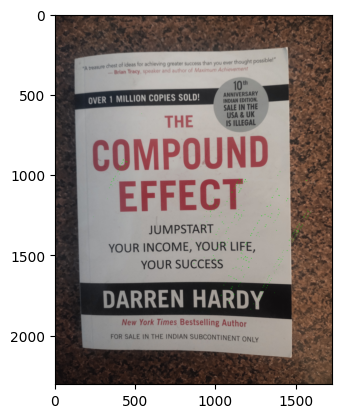

In [9]:
orb_detector = cv2.ORB_create(1000)

keyPoint1, des1 = orb_detector.detectAndCompute(imgTest_grey, None)
keyPoint2, des2 = orb_detector.detectAndCompute(imgRef_grey, None)

imgKp_Ref = cv2.drawKeypoints(imgRef, keyPoint1, 0, (0,222,0), None)
imgKp_Ref = cv2.resize(imgKp_Ref, (width//2, height//2))
imgKp_Ref = cv2.cvtColor(imgKp_Ref,cv2.COLOR_BGR2RGB)

plt.imshow(imgKp_Ref)

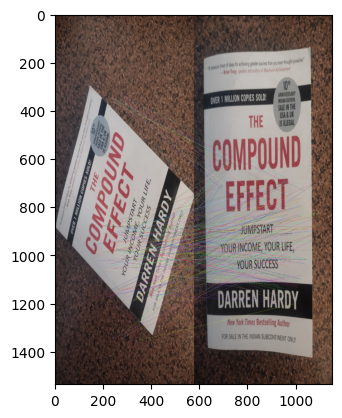

In [11]:
# Create a Brute Force Matcher with Hamming distance.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match the two sets of descriptors.
matches = matcher.match(des1, des2)

# Convert the matches to a list so that you can sort them.
matches = list(matches)

# Sort matches on the basis of their Hamming distance.
matches.sort(key=lambda x: x.distance)

# Take the top 90 % matches forward.
matches = matches[:int(len(matches) * 0.9)]
no_of_matches = len(matches)

# Display only 100 best matches.
imgMatch = cv2.drawMatches(imgTest, keyPoint2, imgRef, keyPoint1, matches[:200], None, flags=2)
imgMatch = cv2.resize(imgMatch, (width // 3, height // 3))

imgMatch = cv2.cvtColor(imgMatch,cv2.COLOR_BGR2RGB)
plt.imshow(imgMatch)